In [82]:
from google.colab import files
uploaded = files.upload()
if uploaded:
  print("file uploaded succesfully")
else:
  print("files not uploaded")

Saving customer_segmentation.csv to customer_segmentation (1).csv
file uploaded succesfully


In [83]:
# importing our libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
df = pd.read_csv('customer_segmentation.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [85]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [87]:
# sum of null value
df.isnull().sum()


,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [88]:
df.dropna(inplace=True)
print(df.isnull().sum().sum())



0


In [89]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [90]:
df['Education'].value_counts()


,count
Education,
Graduation,1116
PhD,481
Master,365
2n Cycle,200
Basic,54


In [91]:
df['Marital_Status'].value_counts()

,count
Marital_Status,
Married,857
Together,573
Single,471
Divorced,232
Widow,76
Alone,3
Absurd,2
YOLO,2


DATA CLEANING


In [92]:
df['Marital_Status'].unique()
# absurd and yolo should be removed

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [93]:
df['Marital_Status'] = df['Marital_Status'].replace({'Absurd':'others','Alone':'Single','YOLO':'others'})

In [94]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst = True)

In [95]:
#calculate the age of the customers
df['Age'] = - df['Year_Birth'] + 2025

In [96]:
df['Age']

,Age
0,68
1,71
2,60
3,41
4,44
...,...
2235,58
2236,79
2237,44
2238,69


In [97]:
df['Total_children'] = df['Kidhome'] + df['Teenhome']

In [98]:
df['Total_children'].sum()

np.int64(2099)

In [99]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_children'],
      dtype='object')

In [100]:
spend_cols = ['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']

In [101]:
df['Total_spending'] = df[spend_cols].sum(axis=1)

In [102]:
df['Total_spending']

,Total_spending
0,1617
1,27
2,776
3,53
4,422
...,...
2235,1341
2236,444
2237,1241
2238,843


In [103]:
#  identifying loyal or long-term customers based on how many days they’ve been with the company.
df['Customer_Since'] = (pd.Timestamp('today') - df['Dt_Customer']).dt.days

In [104]:
df['Customer_Since']

,Customer_Since
0,4715
1,4165
2,4364
3,4191
4,4213
...,...
2235,4433
2236,4071
2237,4207
2238,4208


In [105]:
# Top 10 customers who have been with the company the longest
longest_customers = df.sort_values(by='Customer_Since', ascending=False).head(10)
longest_customers.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_children,Total_spending,Customer_Since
1255,6653,1970,PhD,Married,55158.0,1,1,2012-07-30,72,293,...,0,0,0,3,11,1,55,2,418,4751
1363,6181,1950,2n Cycle,Together,52203.0,0,0,2012-07-31,36,488,...,0,0,0,3,11,0,75,0,939,4750
724,4692,1976,Graduation,Married,7500.0,1,0,2012-08-01,19,7,...,0,0,0,3,11,1,49,1,71,4749
2194,7118,1957,Graduation,Married,73803.0,0,1,2012-08-01,61,833,...,0,0,0,3,11,1,68,1,1528,4749
2029,10001,1985,2n Cycle,Together,7500.0,1,0,2012-08-01,98,5,...,0,0,0,3,11,0,40,1,100,4749


## EXPLORATORY DATA ANALYSIS

<function matplotlib.pyplot.show(close=None, block=None)>

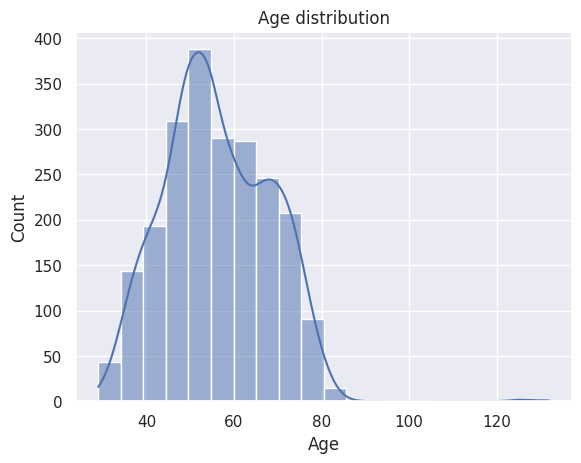

In [106]:
# Age distribution
sns.histplot(df['Age'], bins= 20, kde=True)
plt.title('Age distribution')
plt.show

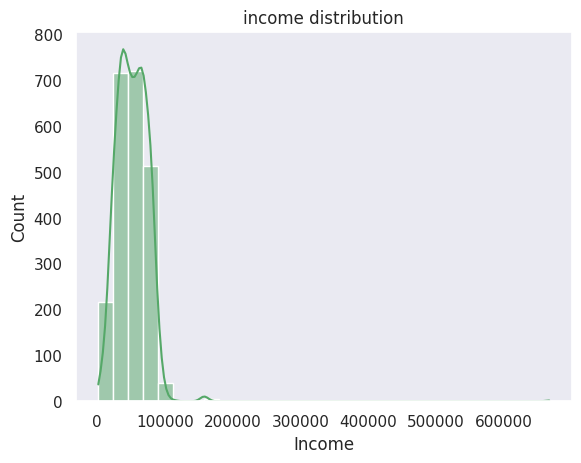

In [107]:
 # income distribution
 sns.set_theme(style = 'dark')
 sns.histplot(df['Income'], bins= 30, kde = True, color = 'g')
 plt.title('income distribution')
 plt.show()

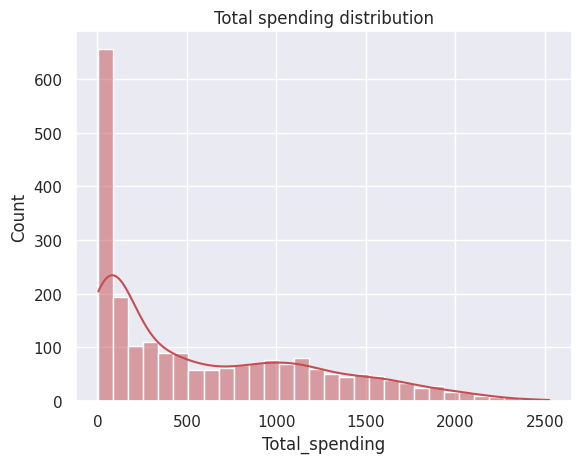

In [108]:
# total spending distribution
sns.set_theme(style="darkgrid")  # white, whitegrid, dark, darkgrid, ticks
sns.histplot(df['Total_spending'], bins=30, kde=True, color = 'r')
plt.title('Total spending distribution')
plt.show()

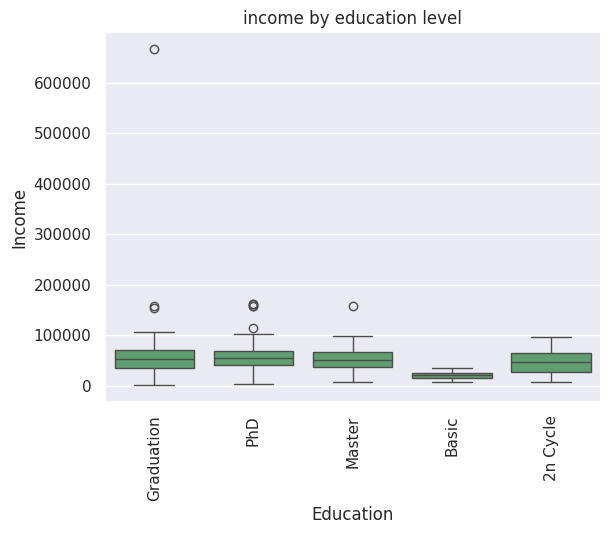

In [109]:
# compare education and income
sns.set_theme(style = 'darkgrid')
sns.boxplot(x = 'Education', y = 'Income', data = df, color = 'g')
plt.xticks(rotation = 90)
plt.title('income by education level')
plt.show()


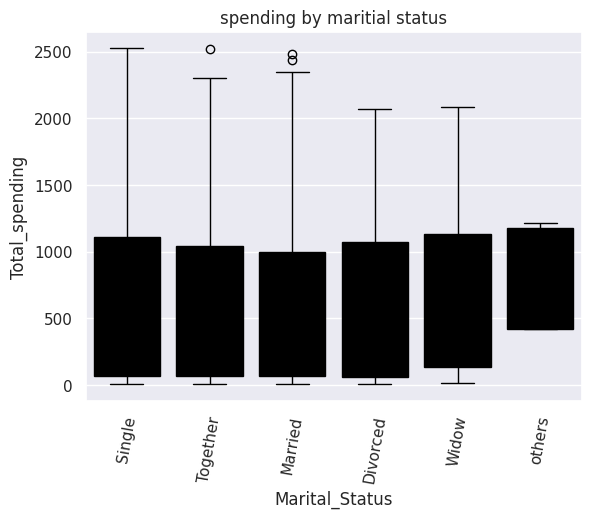

In [110]:
# comparing martial status with income
sns.set_theme(style='darkgrid')
sns.boxplot(x='Marital_Status', y = 'Total_spending', data = df, color = 'black')
plt.xticks(rotation = 80)
plt.title('spending by maritial status')
plt.show()

In [111]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_children', 'Total_spending', 'Customer_Since'],
      dtype='object')

In [112]:
corr = df[['Income','Age','Recency','Total_spending','NumStorePurchases','NumStorePurchases','NumDealsPurchases']].corr()

In [113]:
corr

,Income,Age,Recency,Total_spending,NumStorePurchases,NumStorePurchases,NumDealsPurchases
Income,1.000000,0.161791,-0.003970,0.667576,0.529362,0.529362,-0.083101
Age,0.161791,1.000000,0.016295,0.113487,0.127891,0.127891,0.058668
Recency,-0.003970,0.016295,1.000000,0.020066,-0.000434,-0.000434,0.002115
Total_spending,0.667576,0.113487,0.020066,1.000000,0.675181,0.675181,-0.065854
NumStorePurchases,0.529362,0.127891,-0.000434,0.675181,1.000000,1.000000,0.066107
NumStorePurchases,0.529362,0.127891,-0.000434,0.675181,1.000000,1.000000,0.066107
NumDealsPurchases,-0.083101,0.058668,0.002115,-0.065854,0.066107,0.066107,1.000000


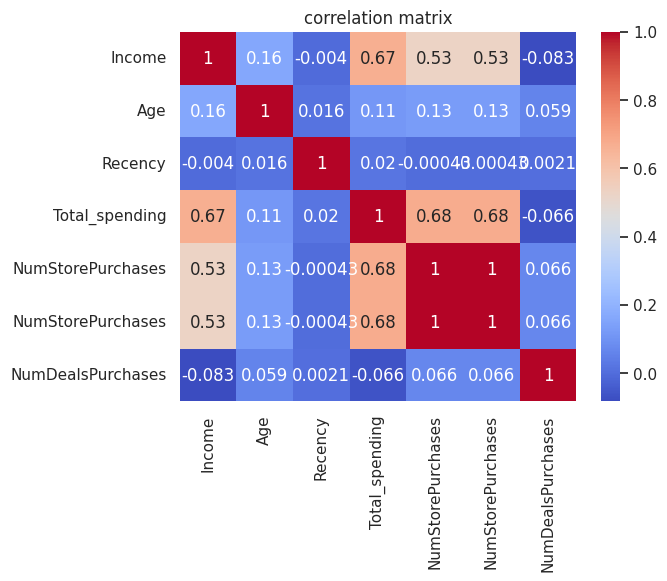

In [114]:
sns.heatmap(corr, annot = True, cmap = "coolwarm")
plt.title("correlation matrix")
plt.show()

In [115]:
pivot_income = df.pivot_table(values = 'Income', index = 'Education',columns = 'Marital_Status')

In [116]:
pivot_income

Marital_Status,Divorced,Married,Single,Together,Widow,others
Education,,,,,,
2n Cycle,49395.130435,46201.100000,53673.944444,44736.410714,51392.200000,NaN
Basic,9548.000000,21960.500000,18238.666667,21240.071429,22123.000000,NaN
Graduation,54526.042017,50800.258741,51252.765182,55758.480702,54976.657143,79244.0
Master,50331.945946,53286.028986,53633.197368,52109.009804,58401.545455,65487.0
PhD,53096.615385,58138.031579,53134.670103,56041.422414,60288.083333,48432.0


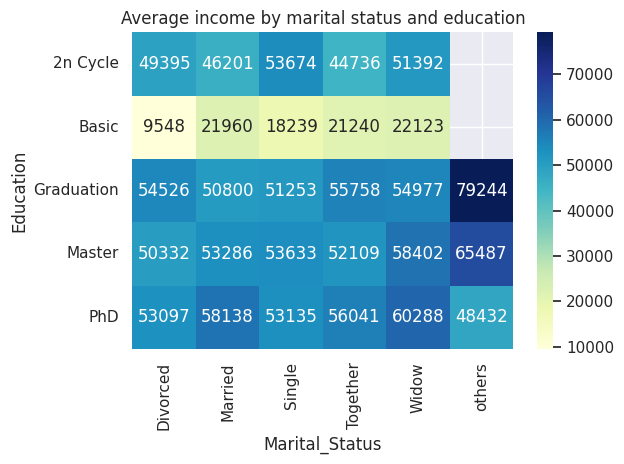

In [117]:
sns.heatmap(pivot_income, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Average income by marital status and education')
plt.xlabel('Marital_Status')
plt.ylabel('Education')
plt.xticks(rotation=90)
plt.yticks(rotation = 0)
plt.tight_layout()
plt.show()


In [118]:
group1 = df.groupby('Education')['Total_spending'].mean().sort_values(ascending = False)

In [119]:
group1

,Total_spending
Education,
PhD,676.733888
Graduation,621.686380
Master,609.767123
2n Cycle,494.930000
Basic,81.796296


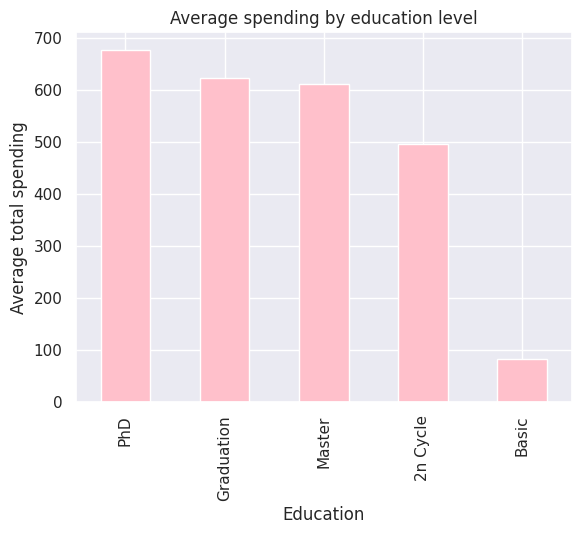

In [120]:
group1.plot(kind = 'bar', color = 'pink')
plt.title('Average spending by education level')
plt.xlabel('Education')
plt.ylabel('Average total spending')
plt.show()


In [121]:
df['Accepted_any'] = df[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2']].sum(axis= 1)

In [122]:
df['Accepted_any'].unique()

array([0, 1, 2, 3, 4])

In [123]:
df['Accepted_any'] = df['Accepted_any'].apply(lambda x: 1 if x>0 else 0 )

In [124]:
df['Accepted_any'].unique()

array([0, 1])

In [125]:
group2 = df.groupby('Marital_Status')['Accepted_any'].mean().sort_values(ascending = False)

<function matplotlib.pyplot.show(close=None, block=None)>

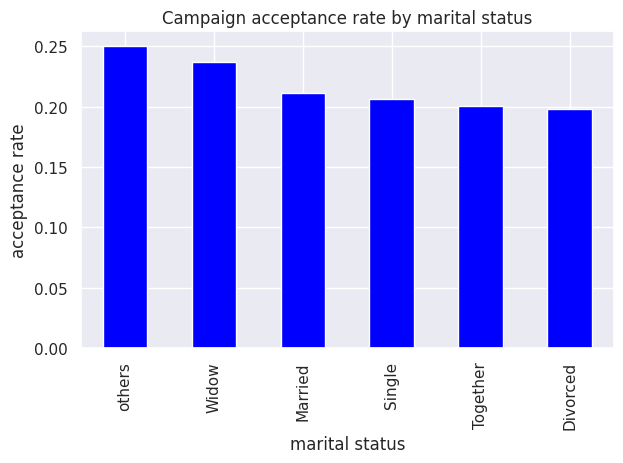

In [126]:
# acceptance rate by marital status
group2.plot(kind='bar', color = 'blue')
plt.title('Campaign acceptance rate by marital status')
plt.xlabel('marital status')
plt.ylabel('acceptance rate')
plt.tight_layout()
plt.show

In [127]:
labels = ['18-25', '25-35', '35-50', '50-65', '65-75', '75-85', '85+']

In [128]:
# Average income by age group
df['Age_group'] = pd.cut(df['Age'], bins = [18,25,35,50,65,75,85,100], labels = labels)

In [129]:
group3 = df.groupby('Age_group')['Income'].mean().sort_values(ascending=False)

/tmp/ipython-input-2349417519.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group3 = df.groupby('Age_group')['Income'].mean().sort_values(ascending=False)


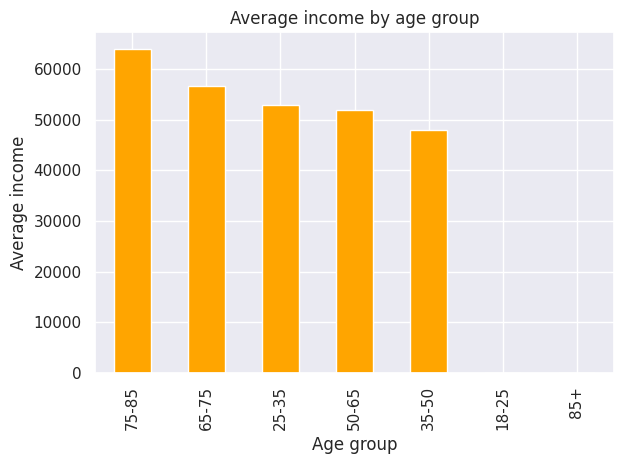

In [130]:
group3.plot(kind = 'bar', color = 'orange')
plt.title('Average income by age group')
plt.xlabel('Age group')
plt.ylabel('Average income')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()


In [131]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_children', 'Total_spending', 'Customer_Since',
       'Accepted_any', 'Age_group'],
      dtype='object')

## Feature Selection
- Selected features for clustering

In [132]:
features = [ 'Age', 'Education','Total_spending','Marital_Status', 'Income', 'Total_children',
    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
    'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
    'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
    'NumWebVisitsMonth', 'Recency', 'Customer_Since']

In [133]:
x = df[features].copy()
x


,Age,Education,Total_spending,Marital_Status,Income,Total_children,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Recency,Customer_Since
0,68,Graduation,1617,Single,58138.0,0,635,88,546,172,88,88,3,8,10,4,7,58,4715
1,71,Graduation,27,Single,46344.0,2,11,1,6,2,1,6,2,1,1,2,5,38,4165
2,60,Graduation,776,Together,71613.0,0,426,49,127,111,21,42,1,8,2,10,4,26,4364
3,41,Graduation,53,Together,26646.0,1,11,4,20,10,3,5,2,2,0,4,6,26,4191
4,44,PhD,422,Married,58293.0,1,173,43,118,46,27,15,5,5,3,6,5,94,4213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,58,Graduation,1341,Married,61223.0,1,709,43,182,42,118,247,2,9,3,4,5,46,4433
2236,79,PhD,444,Together,64014.0,3,406,0,30,0,0,8,7,8,2,5,7,56,4071
2237,44,Graduation,1241,Divorced,56981.0,0,908,48,217,32,12,24,1,2,3,13,6,91,4207
2238,69,Master,843,Together,69245.0,1,428,30,214,80,30,61,2,6,5,10,3,8,4208


Data Preprocessing

In [134]:
x_encoded = pd.get_dummies(x, columns=['Education', 'Marital_Status'], drop_first=True)


In [135]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x_encoded)

In [136]:
X_scaled

array([[ 0.98644293,  1.67548812,  0.2340627 , ..., -0.59055252,
        -0.18845163, -0.04252433],
       [ 1.23680074, -0.96235832, -0.23455948, ..., -0.59055252,
        -0.18845163, -0.04252433],
       [ 0.31882209,  0.28024985,  0.76947764, ...,  1.69332949,
        -0.18845163, -0.04252433],
       ...,
       [-1.01641959,  1.05169551,  0.18809052, ..., -0.59055252,
        -0.18845163, -0.04252433],
       [ 1.06989553,  0.39140438,  0.67538765, ...,  1.69332949,
        -0.18845163, -0.04252433],
       [ 1.23680074, -0.7218    ,  0.02470453, ..., -0.59055252,
        -0.18845163, -0.04252433]])

In [137]:
from sklearn.cluster import KMeans
MIT = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    MIT.append(kmeans.inertia_)

In [138]:
MIT

[45439.29354419543,
 43290.61457623305,
 40800.067105537724,
 39577.45672503579,
 38451.6376949588,
 37055.76837679658,
 35123.98026811758,
 34083.40348630449]

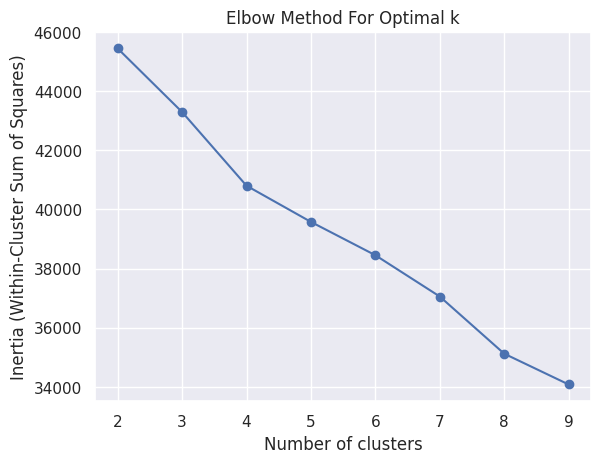

In [139]:
plt.plot(range(2,10),MIT, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

In [140]:
kmeans = KMeans(n_clusters = 6)
df['Cluster'] = kmeans.fit_predict(X_scaled)

In [141]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_CostContact,Z_Revenue,Response,Age,Total_children,Total_spending,Customer_Since,Accepted_any,Age_group,Cluster
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,3,11,1,68,0,1617,4715,0,65-75,2
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,3,11,0,71,2,27,4165,0,65-75,3
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,3,11,0,60,0,776,4364,0,50-65,2
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,3,11,0,41,1,53,4191,0,35-50,3
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,11,0,44,1,422,4213,0,35-50,4


In [142]:
cluster_summary = df.groupby('Cluster')[features].mean(numeric_only=True)
cluster_summary

,Age,Total_spending,Income,Total_children,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Recency,Customer_Since
Cluster,,,,,,,,,,,,,,,,,
0,47.537037,81.796296,20306.259259,0.722222,7.240741,11.111111,11.444444,17.055556,12.111111,22.833333,1.796296,1.888889,0.481481,2.851852,6.870370,48.444444,4480.203704
1,59.340369,568.865435,52180.461741,1.369393,343.472296,15.408971,110.261214,22.485488,16.931398,60.306069,4.728232,6.113456,2.340369,6.472296,6.664908,47.430079,4494.277045
2,56.507123,1166.207977,71524.116809,0.452991,481.515670,78.726496,323.655271,109.259259,78.441595,94.609687,1.746439,5.621083,5.270655,8.592593,3.313390,48.920228,4410.381766
3,53.931478,92.458244,35889.513919,1.239829,40.073876,4.765525,21.961456,6.761242,4.754818,14.141328,1.855460,2.002141,0.532120,3.233405,6.264454,49.511777,4353.072805
4,60.567669,950.639098,63881.864662,0.793233,647.319549,24.875940,174.687970,32.725564,22.796992,48.233083,2.432331,6.469925,4.090226,8.571429,5.033835,47.086466,4435.090226
5,56.551724,1623.693966,83140.642241,0.056034,719.344828,57.172414,633.939655,88.758621,63.737069,60.741379,1.150862,4.612069,6.771552,8.327586,2.314655,52.068966,4413.038793


In [143]:
df['Cluster'].value_counts()

,count
Cluster,
3,934
1,379
2,351
4,266
5,232
0,54


In [144]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 2)
pca_data = pca.fit_transform(X_scaled)
df['PCA1'], df['PCA2'] = pca_data[:,0], pca_data[:,1]

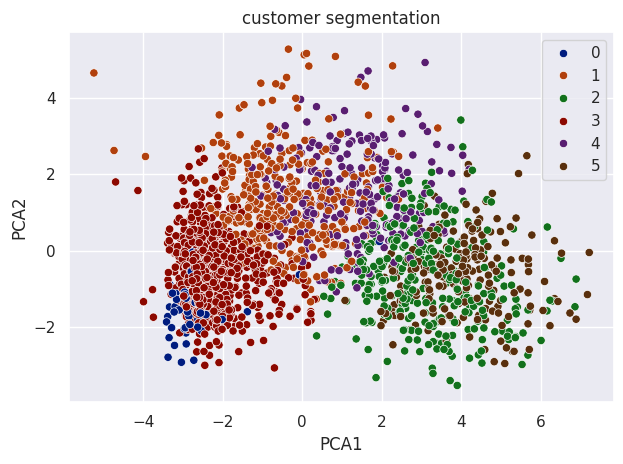

In [145]:
sns.scatterplot(x= 'PCA1', y = 'PCA2', hue = 'Cluster', data = df, palette = 'dark' )
plt.title("customer segmentation")
plt.tight_layout()
plt.legend(loc ='best')
plt.show()

In [146]:
cluster_summary

,Age,Total_spending,Income,Total_children,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Recency,Customer_Since
Cluster,,,,,,,,,,,,,,,,,
0,47.537037,81.796296,20306.259259,0.722222,7.240741,11.111111,11.444444,17.055556,12.111111,22.833333,1.796296,1.888889,0.481481,2.851852,6.870370,48.444444,4480.203704
1,59.340369,568.865435,52180.461741,1.369393,343.472296,15.408971,110.261214,22.485488,16.931398,60.306069,4.728232,6.113456,2.340369,6.472296,6.664908,47.430079,4494.277045
2,56.507123,1166.207977,71524.116809,0.452991,481.515670,78.726496,323.655271,109.259259,78.441595,94.609687,1.746439,5.621083,5.270655,8.592593,3.313390,48.920228,4410.381766
3,53.931478,92.458244,35889.513919,1.239829,40.073876,4.765525,21.961456,6.761242,4.754818,14.141328,1.855460,2.002141,0.532120,3.233405,6.264454,49.511777,4353.072805
4,60.567669,950.639098,63881.864662,0.793233,647.319549,24.875940,174.687970,32.725564,22.796992,48.233083,2.432331,6.469925,4.090226,8.571429,5.033835,47.086466,4435.090226
5,56.551724,1623.693966,83140.642241,0.056034,719.344828,57.172414,633.939655,88.758621,63.737069,60.741379,1.150862,4.612069,6.771552,8.327586,2.314655,52.068966,4413.038793


Cluster 0: Low Income, Minimal Spending
Age: ~47

Income: Very low (~20,306)

Spending: Very low overall (~82)

Children: <1 on average

Purchases: Low across all categories

Channel preference: Fewest online/store/catalog purchases

Insight: Possibly students, retirees, or low-income earners with minimal engagement.

Cluster 1: Mid-Age, Moderate-High Income, Wine-Focused Shoppers
Age: ~59

Income: ~52,180

Spending: Moderate (~569)

Children: ~1.4

Purchases: High in wines and meat, moderate in gold/sweets

Channel preference: High catalog and web purchases

Insight: Value premium food (especially wine and meat), active online buyers.

Cluster 2: Affluent, High-Spending Food Enthusiasts
Age: ~56

Income: High (~71,524)

Spending: High (~1166)

Children: Fewest (~0.45)

Purchases: Very high in meat, wine, fish, fruits

Channel preference: Most balanced, very active across all purchase types

Insight: Wealthy individuals who invest heavily in diverse premium food.

Cluster 3: Middle Class, Low-Moderate Spending
Age: ~54

Income: ~35,890

Spending: Low (~92)

Children: ~1.2

Purchases: Low overall, especially in gold and sweets

Channel preference: Minimal store/catalog activity

Insight: Possibly middle-income families with basic consumption behavior.

Cluster 4: Older, Luxury-Oriented Shoppers
Age: ~61

Income: ~63,882

Spending: High (~951)

Children: ~0.8

Purchases: Highest wine and high meat/gold consumption

Channel preference: Active in catalog and store

Insight: Likely older individuals or couples who favor luxury food and classic channels.

Cluster 5: Elite, High-Spending Heavy Buyers
Age: ~57

Income: Highest (~83,141)

Spending: Highest (~1624)

Children: Very few (~0.05)

Purchases: Extremely high in all categories, especially meat and wine

Channel preference: Very strong across web, store, and catalog

Insight: Possibly elite or executive customers with the most diverse and intensive buying behavior.



<function joblib.numpy_pickle.dump(value, filename, compress=0, protocol=None)>